In [65]:
import pandas as pd

df = pd.read_csv('lastfm-2k/user_friends.csv', sep='\t', na_filter=False)
#df = df.drop(['Unnamed: 0'], axis=1)
df

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831
...,...,...
25429,2099,1801
25430,2099,2006
25431,2099,2016
25432,2100,586


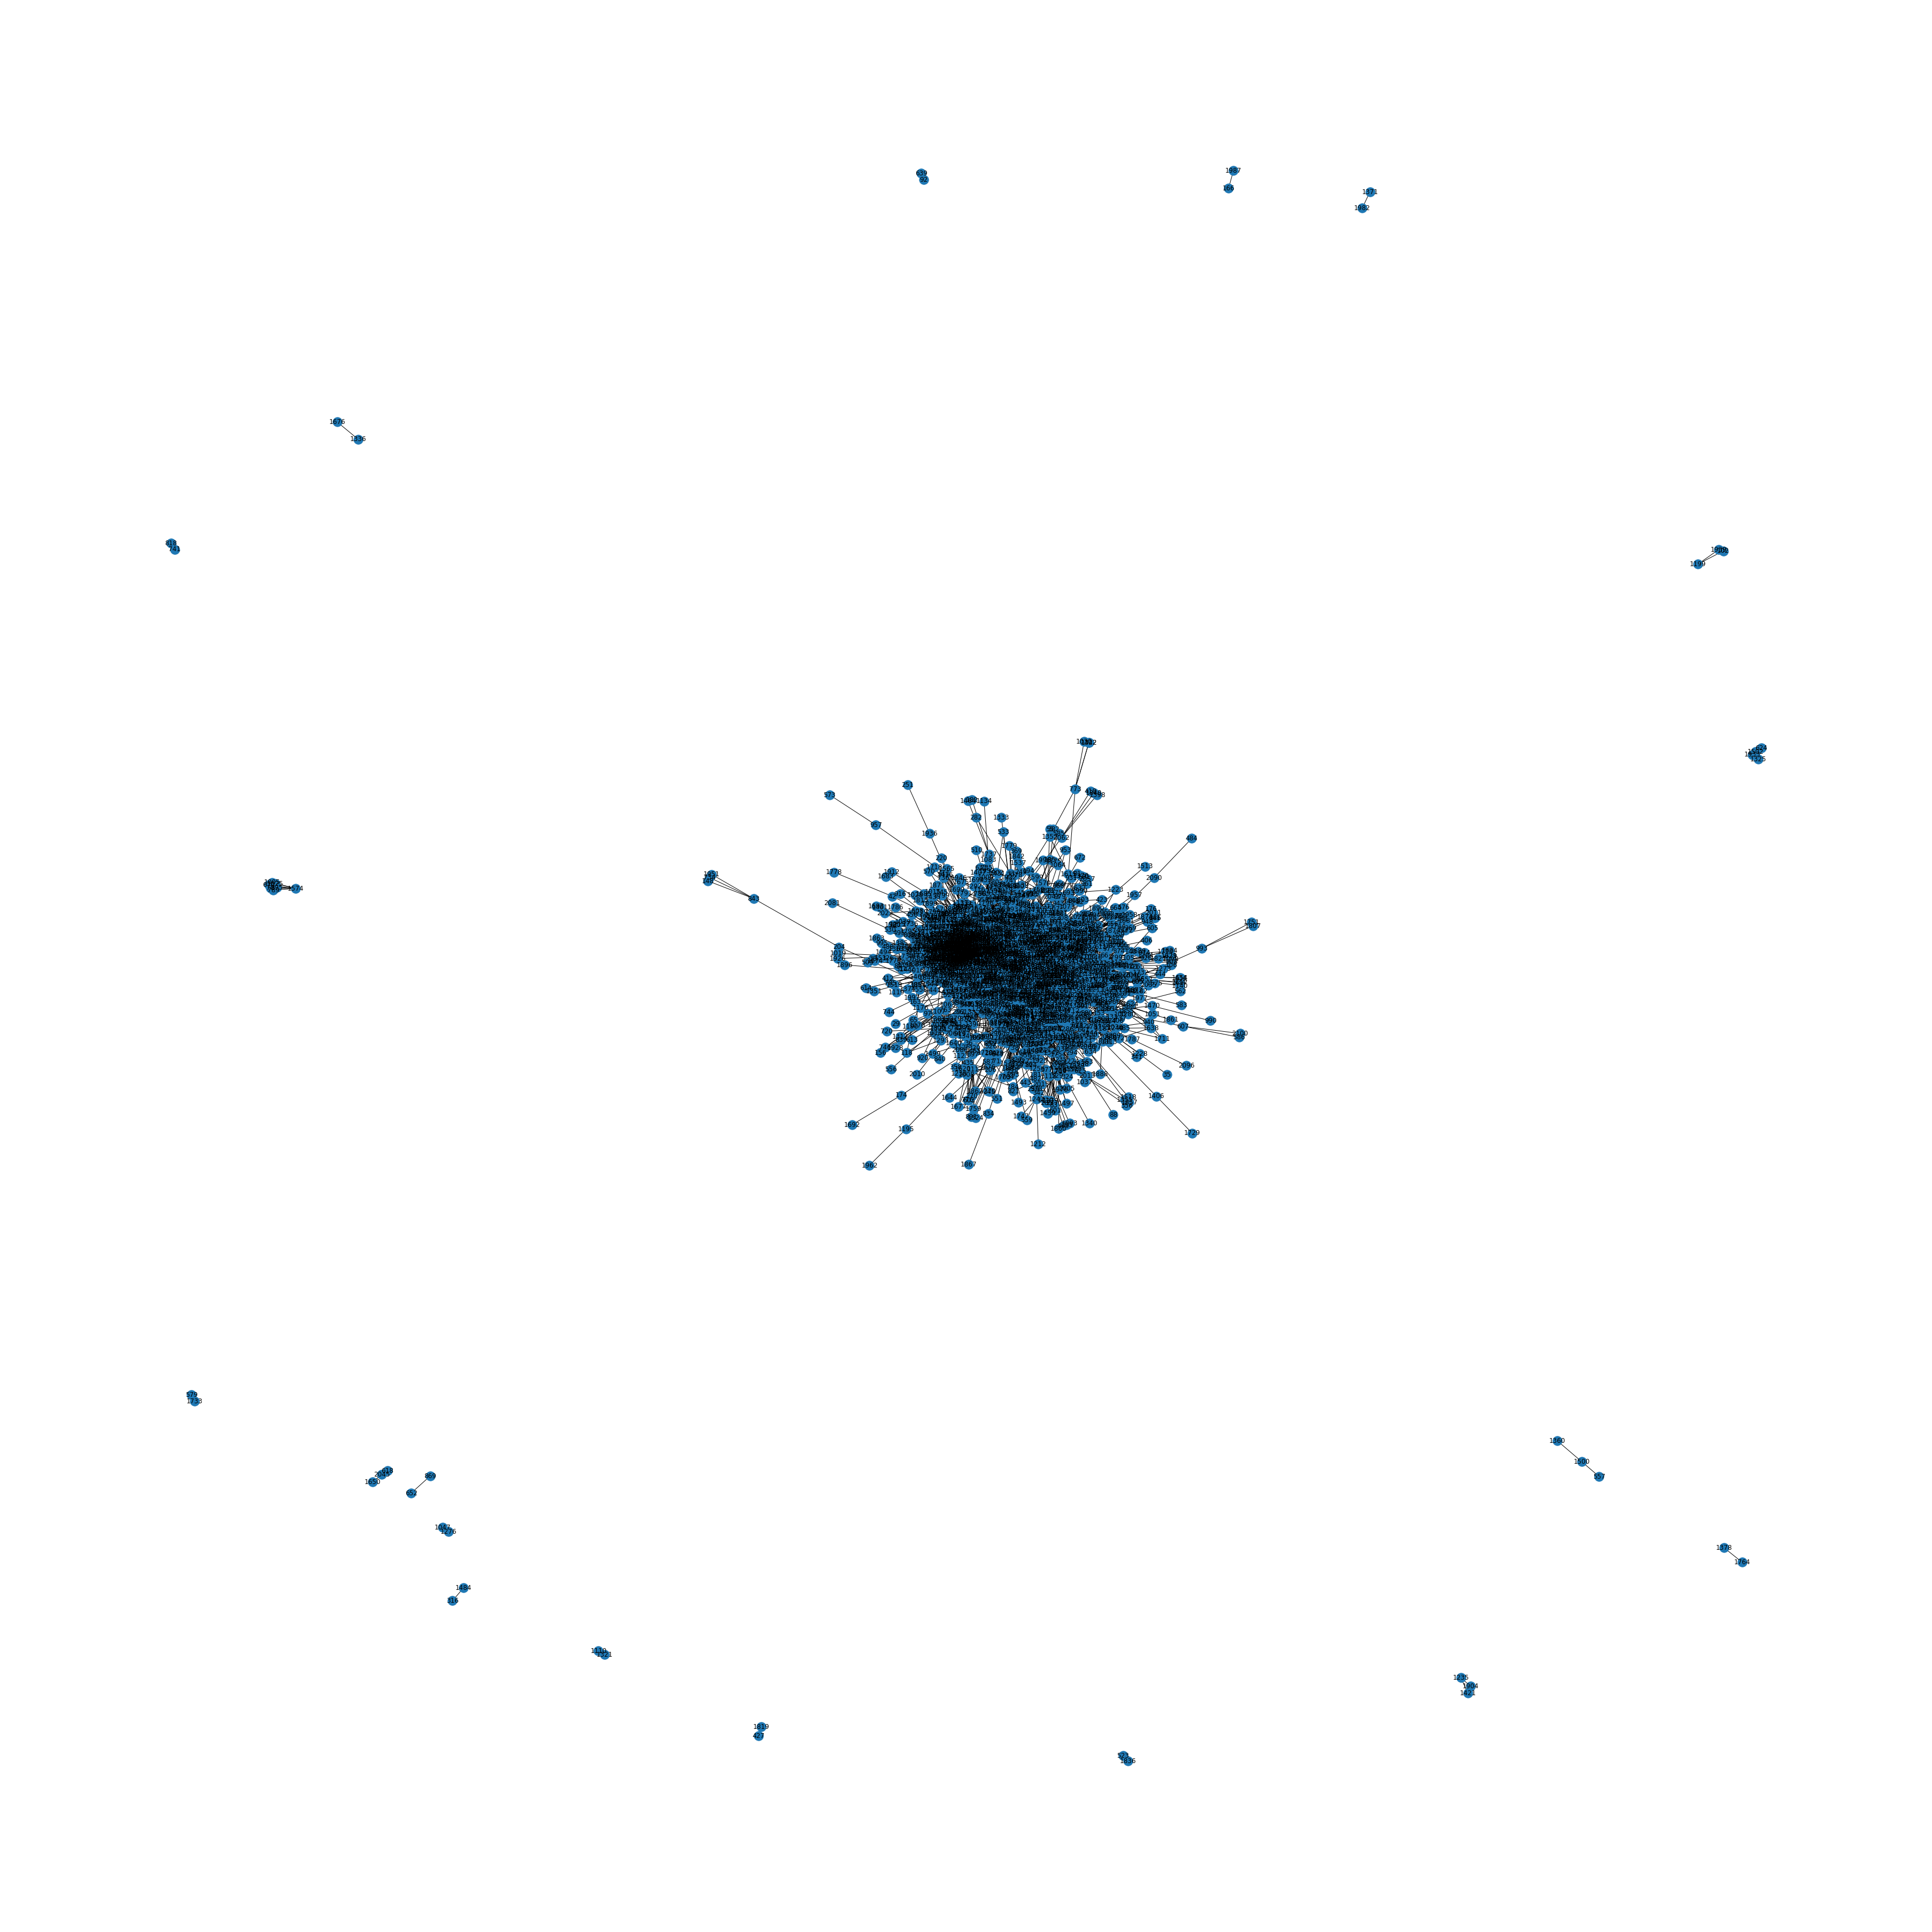

In [92]:
# user-friend graph
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [50,50]

df = pd.read_csv('lastfm-2k/user_friends.csv', sep='\t', na_filter=False)

G = nx.from_pandas_edgelist(df, 'userID','friendID')  
nx.draw(G, with_labels=True)
plt.show()

In [90]:
## degree centrality

deg_centrality = nx.degree_centrality(G)
print(len(deg_centrality))

deg_centrality = pd.DataFrame.from_dict(deg_centrality, orient='index', columns=['degree'])
deg_centrality.sort_values(by=['degree'], ascending=False) # degree 높은 순으로 정렬
# print(deg_centrality)

deg_centrality.head(10) # degree 높은 10명

1892


,degree
2,0.006875
275,0.016922
428,0.011105
515,0.003702
761,0.022739
831,0.056055
909,0.007932
1209,0.006875
1210,0.040190
1230,0.026970


In [89]:
# closeness centrality
close_centrality = nx.closeness_centrality(G)
print(len(close_centrality))

close_centrality = pd.DataFrame.from_dict(close_centrality, orient='index', columns=['closeness'])
close_centrality.sort_values(by=['closeness'], ascending=False) # closeness 높은 순으로 정렬
# print(close_centrality)

close_centrality.head(10) # closeness 높은 10명

1892


,closeness
2,0.317289
275,0.332518
428,0.281587
515,0.277536
761,0.341701
831,0.402212
909,0.316785
1209,0.292942
1210,0.313136
1230,0.362625


In [88]:
# betweeness centrality
bet_centrality = nx.betweenness_centrality(G, normalized = True, endpoints = False)
print(len(bet_centrality))

bet_centrality = pd.DataFrame.from_dict(bet_centrality, orient='index', columns=['betweeness'])
bet_centrality.sort_values(by=['betweeness'], ascending=False) # betweeness 높은 순으로 정렬
# print(bet_centrality)

bet_centrality.head(10) # betweeness 높은 10명

1892


,betweeness
2,0.001337
275,0.005415
428,0.000611
515,0.000093
761,0.011644
831,0.048691
909,0.002786
1209,0.000466
1210,0.019085
1230,0.015445


In [87]:
# page rank
pr = nx.pagerank(G, alpha = 0.8)
# alpha 값 보통 0.8~0.9 사이의 값으로 설정
print(len(pr))

pr = pd.DataFrame.from_dict(pr, orient='index', columns=['rank'])
pr = pr.sort_values(by=['rank'], ascending=False) # pagerank 높은 순으로 정렬
# print(pr)

pr.head(10) # pagerank 높은 10명

1892


,rank
78,0.005397
1543,0.005144
1281,0.004628
1258,0.004203
1210,0.003873
831,0.003586
298,0.002993
1488,0.002891
1213,0.002780
1597,0.002750
